In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from src.training import lr_grid
from src.models import BasicCNN
from src.dataset import get_mnist_dataloaders
from src.constants import MNIST_NUM_CLASSES, MNIST_INPUT_SIZE
from tqdm import tqdm
from src.loss import AccuracyMetric

import torch

lr_grid_values = [0.00001, 0.0001, 0.001, 0.01, 0.1]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_loader, test_loader = get_mnist_dataloaders(batch_size=512, num_workers=4, pin_memory=True)

model = BasicCNN(MNIST_INPUT_SIZE, MNIST_NUM_CLASSES)
model.to(device)

loss = torch.nn.CrossEntropyLoss()
metric = AccuracyMetric()

train_loss_list, val_loss_list, val_metric_list = lr_grid(
    model, train_loader, test_loader, loss, metric, lr_grid_values, 10, device, use_tqdm=False, mode="max"
)





100%|██████████| 5/5 [08:06<00:00, 97.34s/it]


In [2]:
print(val_metric_list)

[0.8626436114311218, 0.9224954038858414, 0.8992130070924759, 0.9594094663858413, 0.9528952211141586, 0.9226907163858413, 0.969140625, 0.9726849734783173, 0.9735638797283173, 0.9736213237047195]


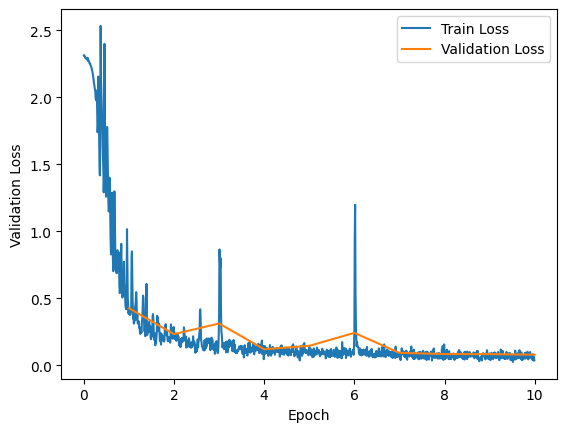

In [3]:
import matplotlib.pyplot as plt
import numpy as np

train_index = np.arange(0, len(train_loss_list))/ len(train_loader)
val_index = np.arange(0, len(val_loss_list))+1
plt.plot(train_index, train_loss_list, label='Train Loss')
plt.plot(val_index, val_loss_list, label='Validation Loss')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')

plt.legend()
plt.show()
